Logistic regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv(r'C:\Users\BATTULA TULASI RAO\Desktop\data science\Learning\techtable\test-AV3.xls')
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,False,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,True,False,False
365,False,False,False,False,False,False,False,False,False,False,False,False,False


In [2]:
df.ffill(inplace=True)
inputs = df.drop('Loan_Status',axis='columns')
inputs

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [3]:
df['Dependents'].replace('3+','3',inplace=True)

In [4]:
df['Dependents'].value_counts()

0    203
2     61
1     60
3     43
Name: Dependents, dtype: int64

In [5]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,Y
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,Y
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban,Y
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,Y


In [6]:
df['Credit_History'].unique()

array([1., 0.])

In [7]:
from sklearn.preprocessing import LabelEncoder
le_Gender = LabelEncoder()
le_Married = LabelEncoder()
le_Education = LabelEncoder()
le_Self_Employed = LabelEncoder()
le_Property_Area = LabelEncoder()

In [8]:
inputs['Gender_n'] = le_Gender.fit_transform(inputs['Gender'])
inputs['Married_n'] = le_Married.fit_transform(inputs['Married'])
inputs['Education_n'] = le_Education.fit_transform(inputs['Education'])
inputs['Self_Employed_n'] = le_Self_Employed.fit_transform(inputs['Self_Employed'])
inputs['Property_Area_n'] = le_Property_Area.fit_transform(inputs['Property_Area'])

In [9]:
inputs_n = inputs.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_ID'],axis='columns')
inputs_n['Dependents'].replace('3+','3',inplace=True)
inputs_n

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_n,Married_n,Education_n,Self_Employed_n,Property_Area_n
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,2
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,2
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,2
3,2,2340,2546,100.0,360.0,1.0,1,1,0,0,2
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,2
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,2
364,0,3250,1993,126.0,360.0,1.0,1,0,0,0,1
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n,df['Loan_Status'],train_size=0.9)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

C:\Users\BATTULA TULASI RAO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_test

56     Y
190    Y
114    Y
158    Y
239    Y
362    Y
15     Y
168    N
258    Y
184    Y
104    Y
225    Y
335    Y
208    Y
351    Y
117    N
197    Y
201    Y
149    Y
137    Y
300    Y
295    Y
317    N
90     Y
133    Y
355    Y
177    Y
47     Y
200    Y
169    Y
302    Y
164    Y
240    Y
232    Y
284    Y
48     Y
305    Y
Name: Loan_Status, dtype: object

In [15]:
model.score(X_test,y_test)

1.0

In [16]:
model.predict_proba(X_train)

array([[3.83470408e-02, 9.61652959e-01],
       [8.51693355e-01, 1.48306645e-01],
       [3.87495726e-02, 9.61250427e-01],
       [1.18418282e-02, 9.88158172e-01],
       [3.38373828e-02, 9.66162617e-01],
       [1.16338837e-02, 9.88366116e-01],
       [3.68280253e-02, 9.63171975e-01],
       [1.18821035e-02, 9.88117897e-01],
       [9.03970459e-01, 9.60295412e-02],
       [3.58347252e-02, 9.64165275e-01],
       [4.35948428e-02, 9.56405157e-01],
       [3.49165867e-02, 9.65083413e-01],
       [1.10846593e-02, 9.88915341e-01],
       [3.52408705e-02, 9.64759130e-01],
       [3.18433656e-02, 9.68156634e-01],
       [8.75602973e-01, 1.24397027e-01],
       [3.87863466e-02, 9.61213653e-01],
       [3.92078823e-02, 9.60792118e-01],
       [3.01749991e-02, 9.69825001e-01],
       [4.29109862e-02, 9.57089014e-01],
       [3.84518908e-02, 9.61548109e-01],
       [4.94110781e-02, 9.50588922e-01],
       [2.09623322e-02, 9.79037668e-01],
       [4.26339186e-02, 9.57366081e-01],
       [4.567121

Decision tree

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n,df['Loan_Status'],train_size=0.9)

In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [19]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
X_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_n,Married_n,Education_n,Self_Employed_n,Property_Area_n
59,3,4720,0,90.0,180.0,1.0,1,1,0,0,1
155,0,1599,2474,125.0,300.0,1.0,1,0,1,1,1
211,0,5333,2400,200.0,360.0,0.0,1,0,0,0,0
73,0,3900,2094,232.0,360.0,1.0,1,1,0,1,0
144,2,10890,0,260.0,12.0,1.0,1,1,0,1,0
61,0,7016,292,125.0,360.0,1.0,1,1,0,1,2
130,0,3333,1270,124.0,360.0,1.0,1,1,0,0,2
244,0,2107,0,64.0,360.0,1.0,0,0,1,0,1
278,3,3634,910,176.0,360.0,0.0,1,1,1,0,1
202,3,3016,1300,100.0,360.0,1.0,1,1,0,0,2


In [21]:
model.score(X_test,y_test)  

1.0

K nearest neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [23]:
pred = knn.predict(X_test)
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y'],
      dtype=object)

In [24]:
knn.score(X_test,y_test)

0.7567567567567568

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [26]:
print(confusion_matrix(y_test,pred))

[[ 2  7]
 [ 2 26]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           N       0.50      0.22      0.31         9
           Y       0.79      0.93      0.85        28

    accuracy                           0.76        37
   macro avg       0.64      0.58      0.58        37
weighted avg       0.72      0.76      0.72        37



In [28]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,inputs_n,df['Loan_Status'],cv=10)
    accuracy_rate.append(score.mean())

In [29]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,inputs_n,df['Loan_Status'],cv=10)
    error_rate.append(1-score.mean())

In [30]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

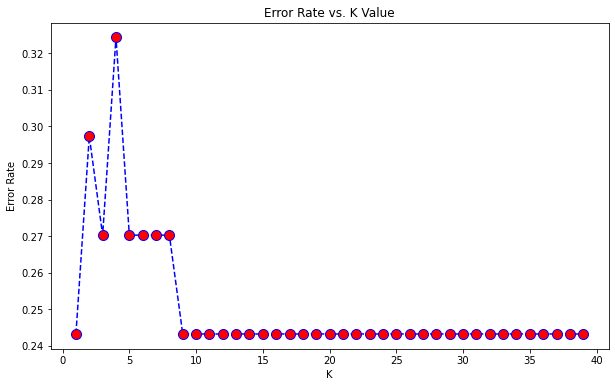

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
        # markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[ 0  9]
 [ 0 28]]


              precision    recall  f1-score   support

           N       0.00      0.00      0.00         9
           Y       0.76      1.00      0.86        28

    accuracy                           0.76        37
   macro avg       0.38      0.50      0.43        37
weighted avg       0.57      0.76      0.65        37



C:\Users\BATTULA TULASI RAO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
knn.score(X_test,y_test)

0.7567567567567568

Support vector machine

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n,df['Loan_Status'],train_size=0.9)

In [35]:
from sklearn.svm import SVC
model = SVC()

In [36]:
model.fit(X_train, y_train)

C:\Users\BATTULA TULASI RAO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
model.score(X_test, y_test)

0.8918918918918919